In [2]:
import pandas as pd
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 945c9ed766a61c7d2c0a7cbb251b6edebf9cb7d5
python           : 3.7.7.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 20.6.0
Version          : Darwin Kernel Version 20.6.0: Wed Jun 23 00:26:27 PDT 2021; root:xnu-7195.141.2~5/RELEASE_ARM64_T8101
machine          : x86_64
processor        : i386
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.UTF-8

pandas           : 1.3.4
numpy            : 1.21.2
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.2.2
setuptools       : 58.0.4
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.7.1
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.0.2
IPython          : 7.29.0
pandas_datareader: None
bs4              : 4.6.0

In [3]:
import os
os.environ["PYTHONIOENCODING"] = "utf-8"

In [4]:
import warnings
warnings.filterwarnings(action = 'ignore')

# 감성 분석 프로젝트1 - 영화 평점 리뷰 데이터 분석

## 데이터 수집 및 탐색

In [5]:
nsmc_train_df = pd.read_csv('./13장_data/ratings_train.txt', encoding='utf8', sep='\t', engine='python')
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [6]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [9]:
# documnet 컬럼이 null인 데이터 삭제
nsmc_train_df = nsmc_train_df[nsmc_train_df['document'].notnull()]
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [10]:
# 타겟 컬럼 label 확인(0 부정감성, 1 긍정감성)
nsmc_train_df[['label']].value_counts()

label
0        75170
1        74825
dtype: int64

In [13]:
# 한글 이외의 문자는 공백으로 변환(정규표현식 이용)
import re
nsmc_train_df['document'] = nsmc_train_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


## 평가용 데이터 준비

In [15]:
# 평가용 데이터 파일 로드
nsmc_test_df = pd.read_csv('./13장_data/ratings_test.txt', encoding='utf8', sep='\t', engine='python')
nsmc_test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [16]:
# 데이터의 정보 확인
nsmc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [18]:
# documnet 컬럼이 null인 샘플 제거
nsmc_test_df = nsmc_test_df[nsmc_test_df['document'].notnull()]

In [19]:
# 타겟 컬럼 label 확인
print(nsmc_test_df['label'].value_counts())

1    25171
0    24826
Name: label, dtype: int64


In [22]:
# 한글 이외의 문자는 공백으로 변환
nsmc_test_df['documennt'] = nsmc_test_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', "", x))

In [24]:
nsmc_test_df['documennt'].tolist()

['굳 ㅋ',
 '',
 '뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아',
 '지루하지는 않은데 완전 막장임 돈주고 보기에는',
 '만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠',
 '음악이 주가 된 최고의 음악영화',
 '진정한 쓰레기',
 '마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가고개를 젖게한다',
 '갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한남무 아 그립다 동사서독같은 영화가 이건 류아류작이다',
 '이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨  모든 사람이 그렇지는 않네',
 '괜찮네요오랜만포켓몬스터잼밌어요',
 '한국독립영화의 한계 그렇게 아버지가 된다와 비교됨',
 '청춘은 아름답다 그 아름다움은 이성을 흔들어 놓는다 찰나의 아름다움을 잘 포착한 섬세하고 아름다운 수채화같은 퀴어영화이다',
 '눈에 보이는 반전이었지만 영화의 흡인력은 사라지지 않았다',
 '스토리 연출 연기 비주얼 등 영화의 기본 조차 안된 영화에 무슨 평을 해 이런 영화 찍고도 김문옥 감독은 내가 영화 경력이 몇인데 조무래기들이 내 영화를 평론해 같은 마인드에 빠져있겠지',
 '소위 ㅈ문가라는 평점은 뭐냐',
 '최고',
 '발연기 도저히 못보겠다 진짜 이렇게 연기를 못할거라곤 상상도 못했네',
 '나이스',
 '별 재미도없는거 우려먹어  챔프에서 방송 몇번했더라  ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '일의 금요일 나이트메어시리즈와 함께 가장 많은 시리즈를 양산해냈던 헬레이저 시리즈의 첫편 작가의 상상력이 돋보이는 작품이며 갈고리로 사지찢는 고어씬은 지금보더라도 상당히 잔인하고 충격적이다',
 '나름 교훈돋기는 하지만 어쩔수없이 저평점 받을수밖에 없는 저질섹스코미디',
 '꽤 재밌게 본 영화였다',
 '민주화 시대의 억눌린 영혼의 관음적인 욕구 분출인상적이다',
 '일본 천황이 미국으로부터 받은 면죄부의 긴박한 과정을 루즈하고 지저분하게 늘어놓았다',
 '괜히 나올 때 어미 알 건드려서 긁어

## 분석 모델 구축

### 피터 벡터화 : TF-IDF
- 특정 문서에 많이 나타나는 단어는 해당 문서의 단어 벡터에 가중치를 높임.
- 모든 문서에 많이 나타나는 단어는 범용적으로 사용하는 단어로 취급하여 가중치를 낮추는 방식

In [28]:
# 토큰화 한 한글 단어에 TF-IDF 방식을 사용해서 벡터화 작업.
# knolpy -> 형태소 분석

from konlpy.tag import Okt
okt = Okt()

In [29]:
# 형태소 단위로 토큰화
def okt_tokenizer(text):
    tokens  = okt.morphs(text)
    return tokens

In [30]:
# tf_idf 기반 피처 벡터 생성!!!

In [31]:
from sklearn.impute import SimpleImputer

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

#객체 선언
# 단어의 가중치를 벡터화, 모든 문서에서 공통적으로 나왔다면 크게 중요하지 않은 단어로 여김.
tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, ngram_range = (1,2), min_df = 3, max_df = 0.9)

In [34]:
# 단어 사전 만들기
tfidf.fit(nsmc_train_df['document'])

TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 2),
                tokenizer=<function okt_tokenizer at 0x7fbe432ef8c0>)

In [36]:
# 벡터로 변환
nsmc_train_tfidf = tfidf.transform(nsmc_train_df['document'])
tfidf.idf_

array([ 8.15618997, 10.08515056,  9.30744599, ..., 10.43345726,
       11.53206954, 10.2103137 ])

## Sentiment Analysis using Logistic Regression

In [38]:
# 로지스틱 회귀 기반 분석모델 생성
# 긍정, 부정 감성 이진 분류 모델 구축

In [39]:
from sklearn.linear_model import LogisticRegression
SA_lr = LogisticRegression(random_state = 0)

In [40]:
# 로지스틱 회귀 분석 기반 테스트 데이터 훈련..
# x 값 독립변수, y 값 종속변수
# 단어를 뽑아내서 중요한 단어들의 긍정/부정 값을 훈련.

In [41]:
SA_lr.fit(nsmc_train_tfidf, nsmc_train_df['label'])

LogisticRegression(random_state=0)

In [42]:
# 로지스틱 회귀의 best 하이퍼파라미터 찾기

In [46]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV 분류 알고리즘. 회귀 알고리즘에서 사용되는 하이퍼파라미터를 순차적으로 적용해서 학습.
# 가장 좋은 파라미터를 알려줌.
params = {'C': [1,3,3.5,4,4.5,5]}
SA_lr_grid_cv = GridSearchCV(SA_lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)

In [47]:
# 최적 분석 모델 훈련
SA_lr_grid_cv.fit(nsmc_train_tfidf,nsmc_train_df['label'])

# 최적의 매개변수와 최고점수 출력해서 확인
print(SA_lr_grid_cv.best_params_, round(SA_lr_grid_cv.best_score_, 4))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'C': 3} 0.8553


In [48]:
SA_lr_best = SA_lr_grid_cv.best_estimator_  
# best모델 저장


## 분석 모델 평가

### 평가용 데이터를 이용하여 감성 분석 모델 정확도

In [65]:
nsmc_test_tfidf = tfidf.transform(nsmc_test_df['document'])

In [66]:
test_predict = SA_lr_best.predict(nsmc_test_tfidf)
test_predict

array([1, 0, 0, ..., 1, 0, 0])

In [67]:
# 예측값과 종속변수 값을 비교해서 정확도 추출
from sklearn.metrics import accuracy_score

print('감성 분석 정확도 : ', round(accuracy_score(nsmc_test_df['label'], test_predict), 3))

감성 분석 정확도 :  0.857


### 새로운 텍스트에 대한 감성예측

In [86]:
st = input('감성 분석할 문장입력 >>')

감성 분석할 문장입력 >>test


In [87]:
st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)
st = [" ".join(st)]
print(st)

[]
['']


In [88]:
st_tfidf = tfidf.transform(st) # 데이터를 숫자화해야함.
print(st_tfidf)

# 최적 감성 분석 모델에 적용해서
st_predict = SA_lr_best.predict(st_tfidf)
print(st_predict)


[0]


In [77]:
if(st_predict == 0):
    print(st, "->> 부정감성")
else:
    print(st, "->> 긍정감성")

['영화가 좋긴한데 너무 무서운거같아요'] ->> 긍정감성


# 감성 분석 프로젝트2 -  네이버 뉴스 데이터 분석

## 데이터 준비 및 탐색

In [81]:
import json

file_name = '코로나_naver_news'

with open('./13장_data/'+file_name+'.json', encoding='utf8') as j_f:
    data = json.load(j_f)

In [82]:
data_title =[]
data_description = []

for item in data:
    data_title.append(item['title'])
    data_description.append(item['description'])

In [83]:
data_df = pd.DataFrame({'title':data_title, 'description':data_description})

In [84]:
# 한글 이외 문자 제거
# re.sub(pattern, repl,string) -> 형식, 공백, x
data_df['title'] = data_df['title'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
data_df['description'] = data_df['description'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))

data_df.head()  #작업 확인용 출력

,title,description
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...
1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...
2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...
4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...


## 감성 분석 수행

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
data_title_tfidf = tfidf.transform(data_df['title'])

In [90]:
# 분석할 데이터의 피처 벡터화
data_title_tfidf = tfidf.transform(data_df['title'])

# 최적 파라미터 학습 모델에 적용하여 감성 분석.
data_title_predict = SA_lr_best.predict(data_title_tfidf)

print(data_title_predict)

[0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1
 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0
 0 1 1 1 1 0 0 0 0 1 0 0 

In [92]:
data_df['title_label'] = data_title_predict

In [94]:
# 분석할 데이터의 피처 벡터화 -> description 분석
data_description_tfidf = tfidf.transform(data_df['description'])

# 최적 파라미터 학습 모델에 적용하여 감성 분석
data_description_predict = SA_lr_best.predict(data_description_tfidf)

# 감성 분석 결과 값을 데이터 프레임에 저장
data_df['description_label'] = data_description_predict

In [95]:
# 분석 결과가 추가된 데이터 프레임을 csv 파일 저장

In [96]:
# csv 파일로 저장 ---------------------------------------------
data_df.to_csv('./13장_data/'+file_name+'.csv', encoding='euc-kr') 

In [97]:
# 감성 분석 결과 확인 및 시각화 (부정 0 , 긍정 1)
data_df.head()

,title,description,title_label,description_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,0,0
1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,0,0
2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,0,0
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,0,1
4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,0,0


In [98]:
columns_name = ['title','title_label','description','description_label']
NEG_data_df = pd.DataFrame(columns=columns_name)
POS_data_df = pd.DataFrame(columns=columns_name)

for i, data in data_df.iterrows(): 
    title = data["title"] 
    description = data["description"] 
    t_label = data["title_label"] 
    d_label = data["description_label"] 
    
    if d_label == 0: # 부정 감성 샘플만 추출
        NEG_data_df = NEG_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
    else : # 긍정 감성 샘플만 추출
        POS_data_df = POS_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
     
# 파일에 저장.
NEG_data_df.to_csv('./13장_data/'+file_name+'_NES.csv', encoding='euc-kr') 
POS_data_df.to_csv('./13장_data/'+file_name+'_POS.csv', encoding='euc-kr') 

## 감성분석 결과 시각화

In [99]:
POS_description = POS_data_df['description']

In [100]:
POS_description_noun_tk = []

for d in POS_description:
    POS_description_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출

In [101]:
print(POS_description_noun_tk)  #작업 확인용 출력

[['변화', '핵심', '중', '우리', '사회', '신종', '코로나', '바이러스', '감염증', '코로나', '의', '위기', '마주', '언제', '끝', '날', '또', '앞', '미래', '국가', '국민', '어려움', '해결', '저희'], ['한편', '코로나', '로', '해외', '식', '재료', '사재기', '국민', '먹거리', '안정', '생산', '것', '포스트', '코로나', '의', '과제', '부각', '농민', '기본소득', '도입', '통해', '안정', '생산', '기반', '확충', '것'], ['최근', '갤러리', '현대', '창업', '주년', '기념', '전', '이', '작품', '전시', '코로나', '의', '영향', '마스크', '착용', '관람객', '미술', '트렌드', '한국', '미술', '시장', '글', '정태희', '서울', '옥션', '스페셜리스트', '세계', '경기', '침체', '코로나', '여파'], ['코로나', '감안', '차', '면접', '비대', '역량', '검사', '도입', '국내', '최대', '치킨', '프랜차이즈', '제너시스', '비비큐', '회장', '채용', '관계자', '한국', '대표', '책임감', '브랜드', '로서', '코로나', '로', '침체', '채용', '분위기'], ['일', '오후', '서울', '중랑구', '의료', '의료', '잠시', '콘서트', '신종', '코로나', '바이러스', '감염증', '코로나', '환자', '진료', '위해', '수고', '온', '의료', '진', '가수', '폴', '킴', '공연', '보고', '뉴스'], ['플립', '러닝', '온라인', '학습', '후', '교실', '토론', '및', '심화', '학습', '거꾸로', '교실', '불리', '포스트', '코로나', '시대', '교육', '방식', '주목', '아르고', '리더십', '편', '상황', '게임', '통해', '리더십', '유형

In [102]:
POS_description_noun_join = []

for d in POS_description_noun_tk:
    d2 = [w for w in d if len(w) > 1] #길이가 1인 토큰은 제외
    POS_description_noun_join.append(" ".join(d2)) # 토큰을 연결(join)하여 리스트 구성

### 부정 감성 데이터에서 명사만 추출해서 정리

In [103]:
NEG_description = NEG_data_df['description']

NEG_description_noun_tk = []
NEG_description_noun_join = []

for d in NEG_description:
    NEG_description_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출
    
for d in NEG_description_noun_tk:
    d2 = [w for w in d if len(w) > 1]  #길이가 1인 토큰은 제외
    NEG_description_noun_join.append(" ".join(d2)) # 토큰을 연결(join)하여 리스트 구성

### 단어 벡터 값을 내림차순으로 정렬

In [104]:
POS_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2 )
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)

In [105]:
POS_vocab = dict() 

for idx, word in enumerate(POS_tfidf.get_feature_names()):
    POS_vocab[word] = POS_dtm.getcol(idx).sum()
    
POS_words = sorted(POS_vocab.items(), key=lambda x: x[1], reverse=True)

###  부정 감성 데이터의 dtm 구성, dtm을 이용하여 단어사전 구성 후 내림차순 정렬

In [107]:
NEG_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2 )
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)

In [108]:
NEG_vocab = dict() 

for idx, word in enumerate(NEG_tfidf.get_feature_names()):
    NEG_vocab[word] = NEG_dtm.getcol(idx).sum()
    
NEG_words = sorted(NEG_vocab.items(), key=lambda x: x[1], reverse=True)

### 단어사전의 상위 단어로 바 차트 그리기

In [109]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

max = 15  #바 차트에 나타낼 단어의 수 

Fontconfig warning: ignoring UTF-8: not a valid region tag


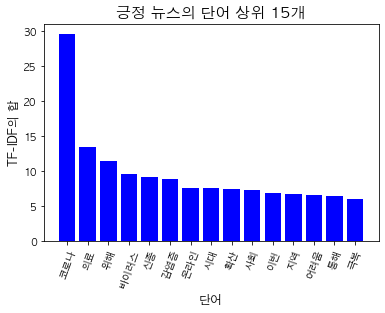

In [110]:
plt.bar(range(max), [i[1] for i in POS_words[:max]], color="blue")
plt.title("긍정 뉴스의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation=70)

plt.show()

# 데이터 분석 프로젝트3 - 토픽 모델링 : LDA 기반 토픽 모델링

## 데이터 준비

In [111]:
description = data_df['description']

In [112]:
description_noun_tk = []
for d in description :
    description_noun_tk.append(okt.nouns(d))

In [113]:
description_noun_tk2 = []

for d in description_noun_tk : 
    item = [i for i in d if len(i) > 1]
    description_noun_tk2.append(item)

In [114]:
print(description_noun_tk2)

[['코로나', '경제', '위기', '대응', '위해', '국세', '수입', '정부', '재정', '마련', '대한', '우려', '때문', '한국', '개발', '국책', '연구기관', '증세', '화두', '정부', '여당', '증세'], ['지난', '창녕군', '보건소', '설치', '진료', '검사', '체온', '측정', '사진', '제공', '창녕군', '코로나', '장기', '대비', '비대', '진료', '도입', '경남', '창녕군', '지난', '도내', '최초', '코로나', '진료'], ['한편', '설현', '최근', '코로나', '바이러스', '시리즈', '세계', '유행', '다큐멘터리', '내레이션', '처음', '도전', '호평', '드라마', '출연', '검토', '게임', '이벤트', '대한'], ['변화', '핵심', '우리', '사회', '신종', '코로나', '바이러스', '감염증', '코로나', '위기', '마주', '언제', '미래', '국가', '국민', '어려움', '해결', '저희'], ['이재', '고용노동부', '장관', '코로나', '긴급', '고용', '안정', '원금', '서울', '센터', '서울', '중구', '방문', '이번', '현장', '방문', '코로나', '긴급', '고용', '안정', '원금', '신청', '시작', '이틀'], ['올해', '신종', '코로나', '바이러스', '감염증', '코로나', '여파', '오프라인', '행사', '진행', '공식', '채널', '통해', '명칭', '초청', '리스트', '공개', '한편', '반도', '국내외'], ['경찰', '코로나', '감염', '우려', '이상', '집회', '봉쇄', '지난', '홍콩', '국가보안법', '시위', '홍콩', '경찰', '코로나', '확산', '올해', '불허', '상황', '처음', '주최'], ['전국', '컨테이너', '처리', '국내', '항만', '신종', '코로나', '바이러스', '감염증

## LDA 토픽 모델 구축

### 단어 사전 생성

In [116]:
import gensim
import gensim.corpora as corpora

In [117]:
dictionary  = corpora.Dictionary(description_noun_tk2)

In [118]:
print(dictionary[1])

경제


### 단어 출현 빈도의 코퍼스 생성

In [119]:
corpus = [dictionary.doc2bow(word) for word in description_noun_tk2]

In [120]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1)], [(17, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 3), (33, 3), (34, 1), (35, 1), (36, 1)], [(5, 1), (17, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(12, 1), (17, 2), (43, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)], [(17, 2), (68, 2), (69, 1), (70, 2), (71, 2), (72, 2), (73, 1), (74, 1), (75, 1), (76, 2), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1)], [(17, 2), (43, 1), (52, 1), (54, 1), (61, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1)], [(11, 1)

### LDA 모델 생성 및 훈련

In [ ]:
k = 4
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations = 12, num_topics = k, id2word = dictionary, passes = 1, workers = 10)

### LDA 토픽 분석 결과 시각화

In [ ]:
print(lda_model_print_topics(num_topics = k, num_words = 15))

### 토픽 분석 결과 시각화 : pyLDAvis

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim

lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

In [ ]:
pyLDAvis.display(lda_vis)

In [ ]:
pyLDAvis.save_html(lda_vis, './13장_data/'+file_name+"_vis.html")